## Observations and Insights 

In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
single_dataset = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
single_dataset

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
number_mice = len(single_dataset["Mouse ID"].unique())

print(f'The number of mice is {number_mice}.')

The number of mice is 249.


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = single_dataset[["Mouse ID", "Timepoint"]]
duplicate_mice

,Mouse ID,Timepoint
0,k403,0
1,k403,5
2,k403,10
3,k403,15
4,k403,20
...,...,...
1888,z969,25
1889,z969,30
1890,z969,35
1891,z969,40


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = single_dataset[single_dataset.duplicated(['Mouse ID','Timepoint'])==False]
duplicate_mouse


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = duplicate_mouse.drop_duplicates()
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice in the clean DataFrame.

print(len(duplicate_mouse["Mouse ID"].unique()))

NameError: name 'duplicate_mouse' is not defined

## Summary Statistics

In [156]:
#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
#mean, median, variance, standard deviation, and SEM of the tumor volume. 
#Assemble the resulting series into a single summary dataframe.

In [ ]:
# mean
drug_df_mean = clean_df.groupby("Drug Regimen").mean("Tumor Volume (mm3)")

del drug_df_mean['Age_months']
del drug_df_mean['Timepoint']
del drug_df_mean['Weight (g)']
del drug_df_mean['Metastatic Sites']

drug_df_mean

In [48]:
#median by drug regimen and tumor volume
drug_df_median = clean_df.groupby("Drug Regimen").median("Tumor Volume (mm3)")

del drug_df_median['Age_months']
del drug_df_median['Timepoint']
del drug_df_median['Weight (g)']
del drug_df_median['Metastatic Sites']

drug_df_median


,Tumor Volume (mm3)
Drug Regimen,
Capomulin,41.557809
Ceftamin,51.776157
Infubinol,51.820584
Ketapril,53.698743
Naftisol,52.509285
Placebo,52.288934
Propriva,50.909965
Ramicane,40.673236
Stelasyn,52.431737


In [51]:
drug_df_variance = clean_df.groupby(["Drug Regimen"])

drug_df_variance.var()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,59.620372,7.466034,206.928043,24.947764,0.720790
Ceftamin,65.147591,2.501016,204.031772,39.290177,1.402527
Infubinol,56.404272,4.769028,181.534470,43.128684,1.054942
Ketapril,36.236432,3.392536,196.839089,68.553577,1.942883
Naftisol,45.102703,2.247748,201.208951,66.173479,1.479919
Placebo,40.384837,3.378146,192.954266,61.168083,1.792449
Propriva,51.678867,2.845658,184.180108,43.138803,1.187097
Ramicane,35.362393,10.465318,203.796178,23.486704,0.477838
Stelasyn,63.036648,2.701473,191.620626,59.450562,0.944874


In [56]:
drug_df_std = clean_df.groupby(["Drug Regimen"])

drug_df_std.std()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,7.721423,2.732404,14.384994,4.994774,0.848993
Ceftamin,8.071406,1.581460,14.283969,6.268188,1.184283
Infubinol,7.510278,2.183810,13.473473,6.567243,1.027104
Ketapril,6.019670,1.841884,14.029935,8.279709,1.393873
Naftisol,6.715855,1.499249,14.184814,8.134708,1.216519
Placebo,6.354907,1.837973,13.890798,7.821003,1.338824
Propriva,7.188801,1.686908,13.571297,6.568014,1.089540
Ramicane,5.946629,3.235014,14.275720,4.846308,0.691259
Stelasyn,7.939562,1.643616,13.842710,7.710419,0.972046


In [66]:
drug_df_sem = clean_df.groupby(["Drug Regimen"])

drug_df_sem.sem()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,0.509136,0.180169,0.948518,0.329346,0.055981
Ceftamin,0.604977,0.118535,1.070629,0.469821,0.088766
Infubinol,0.562919,0.163684,1.009879,0.492236,0.076985
Ketapril,0.439030,0.134333,1.023238,0.603860,0.101659
Naftisol,0.492430,0.109930,1.040081,0.596466,0.089200
Placebo,0.472356,0.136615,1.032495,0.581331,0.099514
Propriva,0.575565,0.135061,1.086573,0.525862,0.087233
Ramicane,0.393825,0.214244,0.945433,0.320955,0.045780
Stelasyn,0.590143,0.122169,1.028921,0.573111,0.072252


In [75]:
drug_group = clean_df.groupby(["Drug Regimen"])

#Use stats functions and assign stats functions to variables
drug_mean = drug_group["Tumor Volume (mm3)"].mean()
drug_median = drug_group["Tumor Volume (mm3)"].median()
drug_variance = drug_group["Tumor Volume (mm3)"].var()
drug_std = drug_group["Tumor Volume (mm3)"].std()
drug_sem = drug_group["Tumor Volume (mm3)"].sem()

summary_statistics_df = pd.DataFrame({"Mean": drug_mean, 
                                      "Median": drug_median, "Variance": drug_variance,
                                      "Standard Deviation": drug_std,
                                      "SEM": drug_sem})

summary_statistics_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [76]:
#Relate the number of mice to each drug with groupby and count function
drug_ticks = single_dataset.groupby(["Drug Regimen"]).count()["Mouse ID"]
drug_ticks

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [ ]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

drug_ticks.plot(kind="bar", figsize=(9,5), color = "orange")

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice in each Drug Regimen")

plt.show()
plt.tight_layout()

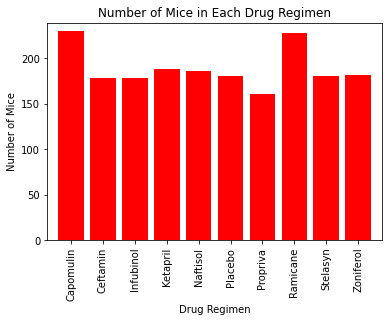

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

In [102]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

#Record all of numerical values that correspond with each drug regimen
#Store numerical values in an array

mice_amount = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

# x-axis = mice amount
x_axis = np.arange(len(drug_ticks))

#invoke .bar to make a bar chart and include previous varibles for x and y axis
plt.bar(x_axis, mice_amount, color='r', alpha=1, align='center')

#create a loop to store all drug regimen values 
tick_mark = [tick for tick in x_axis]

plt.xticks(tick_mark, ['Capomulin', 'Ceftamin', 'Infubinol', 
                       'Ketapril', 'Naftisol', 'Placebo', 
                       'Propriva', 'Ramicane', 'Stelasyn', 
                       'Zoniferol'], rotation = 'vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(mice_amount)+9)

plt.title("Number of Mice in Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.show()
plt.tight_layout


In [13]:
#Group by "Mouse ID" and "Sex" to find the unique number of male vs female
by_gender = single_dataset.groupby(["Mouse ID","Sex"])
by_gender

mouse_gender_df = pd.DataFrame(by_gender.size())

mouse_gender = pd.DataFrame(mouse_gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

#format the percentage of male and female
mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

#format the "Percentage of Sex" column
mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"]

mouse_gender

,Total Count,Percentage of Sex
Sex,,
Female,124,49.799197
Male,125,50.200803


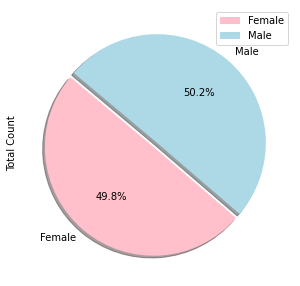

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

colors = ['pink', 'lightblue']
explode = (0.05, 0)
plot = mouse_gender.plot.pie(y='Total Count',figsize=(5,5), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")


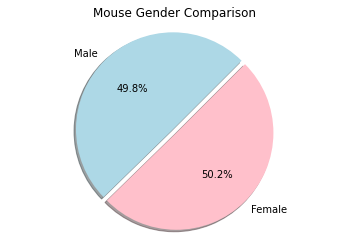

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
percentages = [49.8, 50.2]
gender = ["Male", "Female"]
colors = ["lightblue", "pink"]
explode = [0.05, 0]

plt.title("Mouse Gender Comparison")
plt.pie(percentages, explode=explode, labels=gender, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=45)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [23]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

# Capomulin, Ramicane, Infubinol, and Ceftamin
top_regiment = single_dataset[single_dataset["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

# Start by getting the last (greatest) timepoint for each mouse
top_regiment = top_regiment.sort_values(["Timepoint"], ascending=True)
top_regiment

top_regiment_chart = top_regiment[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

top_regiment_chart

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.000000
1391,Infubinol,q132,0,45.000000
195,Capomulin,i738,0,45.000000
205,Ramicane,a520,0,45.000000
1370,Ceftamin,p438,0,45.000000
...,...,...,...,...
350,Capomulin,v923,45,40.658124
144,Capomulin,m957,45,33.329098
337,Capomulin,j119,45,38.125164
59,Ramicane,s508,45,30.276232


In [26]:
# Put treatments into a list for a for loop
top_regiment_sort = top_regiment_chart.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
top_regiment_sort.head()

# Turn retrieved data into dataframe to easily manipulate
top_regiment_chart = top_regiment_sort.to_frame()
top_regiment_chart

# Create empty list to fill with tumor vol data (for plotting)
top_4 = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
    

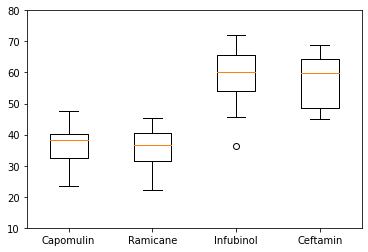

In [27]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_df = top_regiment_chart.reset_index()

tumor_list = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_list)
tumor_list_df = tumor_list_df.reindex(top_4)
tumor_vols = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]


plt.boxplot(tumor_vols, labels=top_4)
plt.ylim(10, 80)
plt.show()

## Line and Scatter Plots

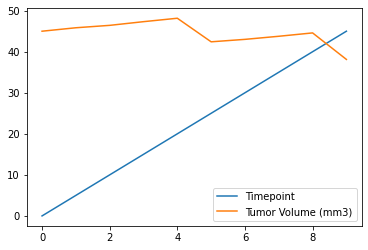

In [31]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

tumor_time = single_dataset[single_dataset["Mouse ID"].isin(["j119"])]
tumor_time

tumor_time_array = tumor_time[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
tumor_time_array

line_chart = time_vs_tumer_data.reset_index()
line_chart

t_line_chart = line_chart[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
t_line_chart

lines = line_plot_final.plot.line()


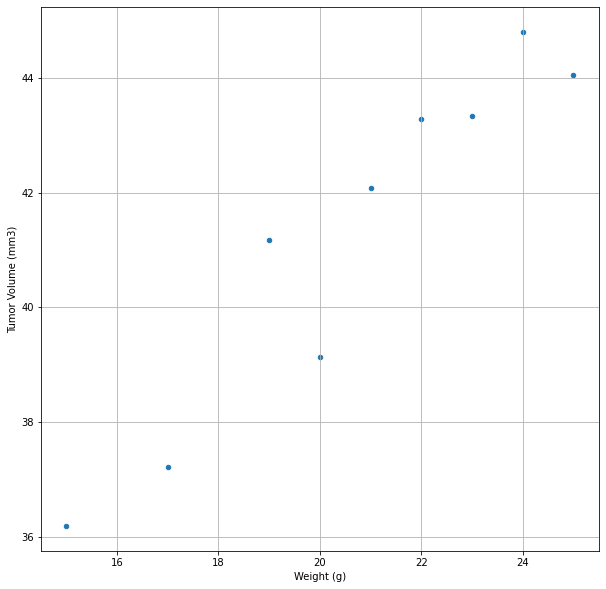

In [34]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_chart = single_dataset[single_dataset["Drug Regimen"].isin(["Capomulin"])]

capomulin_chart_df = top_regiment[["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]]

capomulin_s = capomulin_chart.sort_values(["Weight (g)"], ascending=True)

capomulin_scatter_plot = capomulin_chart.reset_index()

capomulin_weight = capomulin_chart.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()

capo_group = pd.DataFrame(capomulin_weight).reset_index()

capoulin_chart = capo_group.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', grid = True, figsize= (10,10))


## Correlation and Regression

The correlation between both factors is 0.95


Text(6, 10, 'y = 0.89x + 22.76')

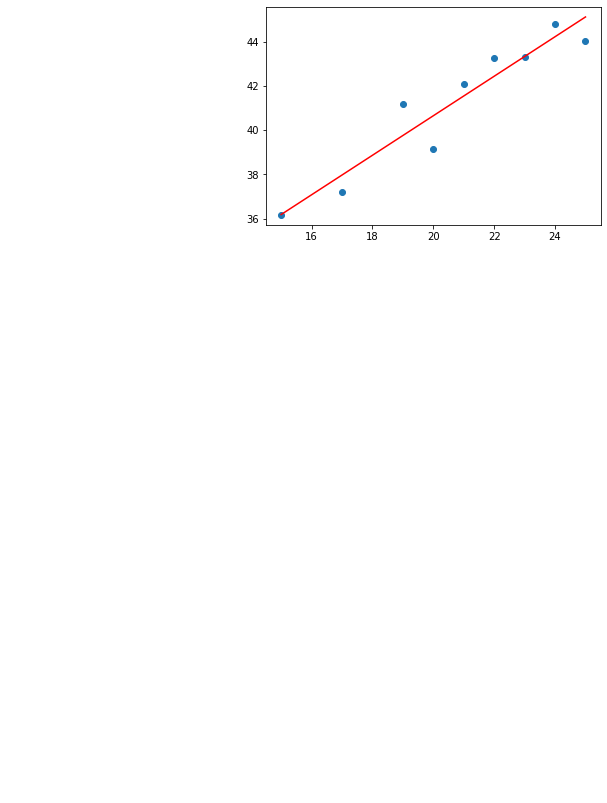

In [40]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#correlation coefficient
weight = capo_group["Weight (g)"]
average_tumor_volume = capo_group["Tumor Volume (mm3)"]
correlation = st.pearsonr(weight, average_tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

#linear regression

(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, average_tumor_volume)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight, average_tumor_volume)
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")